In [ ]:
pip install pandas scikit-learn matplotlib seaborn

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load dataset
df = pd.read_excel("/content/drive/MyDrive/Colab_Notebooks/Sentiment.xlsx")  # Replace with your file path

In [ ]:
# Check the data
print("Sample Data:\n", df.head())

Sample Data:
                                      text sentiment
0  I love the new update, it's fantastic!  positive
1  Totally disappointed with the service.  negative
2        Nothing special, it's just okay.   neutral
3  Customer support was helpful and kind!  positive
4   The app crashes every time I open it.  negative


In [ ]:
# Preprocessing
df.dropna(subset=["text", "sentiment"], inplace=True) # drop rows with missing values
X = df["text"]
y = df["sentiment"]

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [ ]:
# Model training
model = MultinomialNB()
model.fit(X_train_vec, y_train)

MultinomialNB()

In [ ]:
# Prediction
y_pred = model.predict(X_test_vec)

In [ ]:
# Evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       0.0
     neutral       0.00      0.00      0.00       1.0
    positive       0.00      0.00      0.00       2.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

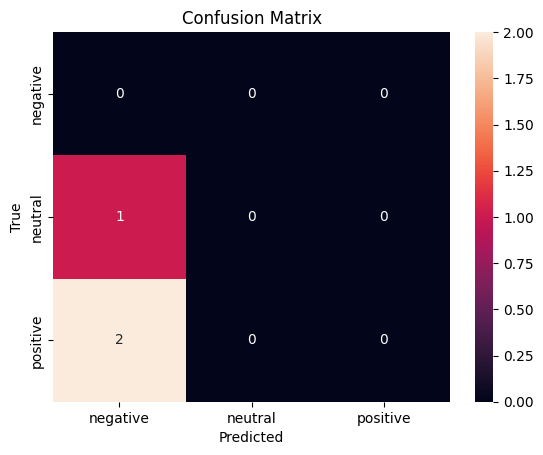

In [ ]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt="d", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# 🔮 Predict sentiment for custom input
print("\n--- Sentiment Prediction on Custom Input ---")
user_input = input("Enter a social media post: ")


--- Sentiment Prediction on Custom Input ---
Enter a social media post: Customer support was helpful and kind!


In [ ]:
# Preprocess and vectorize the input
user_input_vec = vectorizer.transform([user_input])
user_pred = model.predict(user_input_vec)

In [ ]:
# Output the result
print(f"Predicted Sentiment: {user_pred[0]}")

Predicted Sentiment: positive
